In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

<br/>**Load dataset and Prepare data**

In [2]:
# Load dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Prepare data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


<br/>**Add noise to the data**

In [3]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

<br/>**Create Model**

In [4]:
# Design Layers
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Build the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

<br/>**Plot Model**

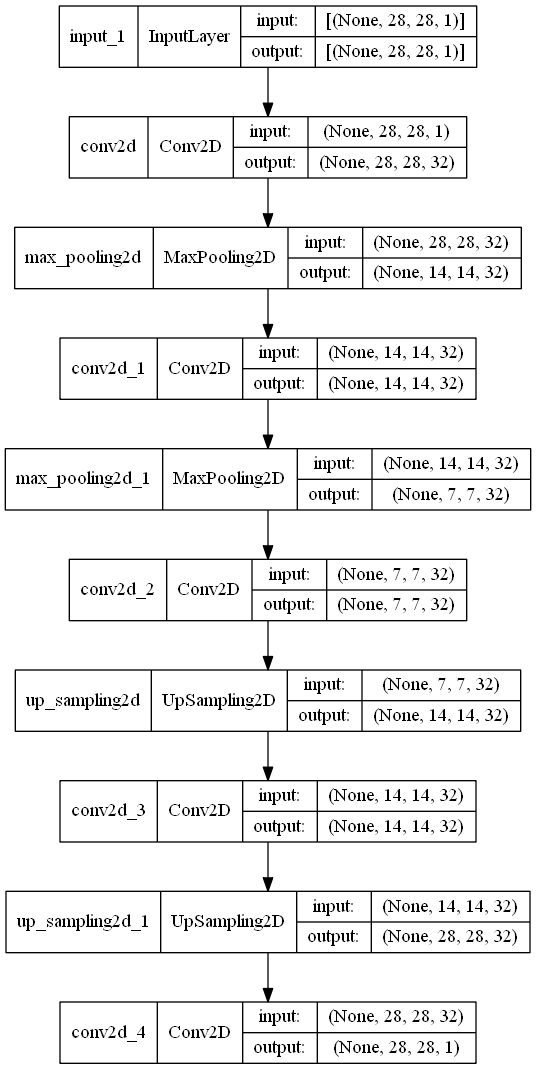

In [8]:
# Plot model
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='AE_model.png', show_shapes=True)

<br/>**Fit the Model**

In [9]:
epochs = 10
batch_size = 128

autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1634 - val_loss: 0.1159
Epoch 2/10
469/469 [==============================] - 50s 108ms/step - loss: 0.1130 - val_loss: 0.1080
Epoch 3/10
469/469 [==============================] - 51s 108ms/step - loss: 0.1075 - val_loss: 0.1047
Epoch 4/10
469/469 [==============================] - 51s 109ms/step - loss: 0.1046 - val_loss: 0.1024
Epoch 5/10
469/469 [==============================] - 53s 112ms/step - loss: 0.1027 - val_loss: 0.1009
Epoch 6/10
469/469 [==============================] - 51s 109ms/step - loss: 0.1013 - val_loss: 0.0999
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.1003 - val_loss: 0.0988
Epoch 8/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0995 - val_loss: 0.0981
Epoch 9/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0988 - val_loss: 0.0977
Epoch 10/10
469/469 [==============================] - 51s 110ms/step - l

<br/>**Visualize our results**

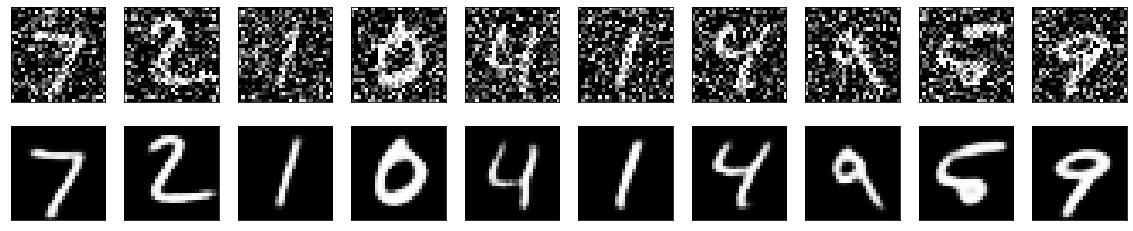

In [10]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<br/>**Save Model and weights**

In [11]:
autoencoder.save('model.h5')
autoencoder.save_weights('model_weights.h5')

<br/>**Load Model and Weights**

In [15]:
from keras.models import load_model

autoencoder_loaded = load_model('model.h5')
autoencoder_loaded.load_weights('model_weights.h5')

autoencoder_loaded.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_loaded.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

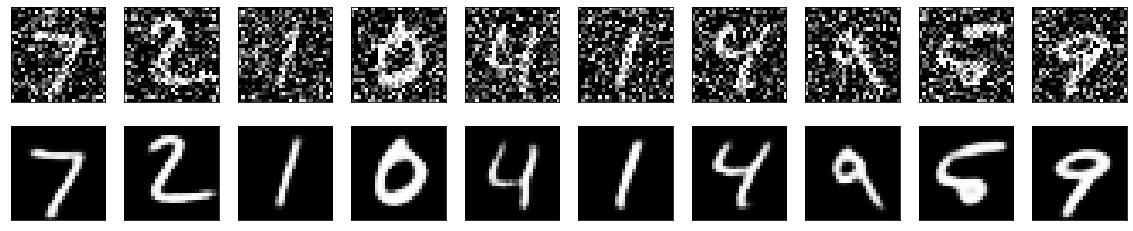

In [16]:
# Predict + Visualization

decoded_imgs = autoencoder_loaded.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()